In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2, os
import glob
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizer_v2 import rmsprop

In [ ]:
label_dict = {"Fake_img":1,"Real_img":0}
categories = ["Fake_img", "Real_img"]

#폴더넘버
folder_num = 1
#불러올 모델
model_path = '/content/drive/MyDrive/aihub/best_model/model3-076-0.0363.hdf5'
#저장될 모델
checkpoint_path = '/content/drive/MyDrive/model/{epoch:03d}-{val_loss:.4f}.hdf5'

# 리얼 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/resized/Real_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 페이크 흑백이미지 폴더 glob
destination_folder = f'/content/drive/MyDrive/resized/Fake_img{folder_num}'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

# 모델 폴더 glob
destination_folder = '/content/drive/MyDrive/model'
F_list = len(glob.glob(f"{destination_folder}/*"))
print(F_list)

0
0
1


In [ ]:
label_dict = {"Fake_img":1,"Real_img":0}
categories = ["Fake_img", "Real_img"]

data=[]
target=[]

# 저장한 파일들 읽어옴
for category in categories:
    img_names=glob.glob(f"/content/drive/MyDrive/resized/{category}{folder_num}/*.jpg")
    print(len(img_names))

    for idx, img_name in enumerate(img_names[:5000]):#카테고리(categories) 당 5000개
        img=cv2.imread(img_name)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            data.append(gray)
            target.append(label_dict[category])
            print(category, idx)

        except Exception as e:
            print('Exception:', e)

# target에 제대로 들어갔는지 개수 확인
from collections import Counter
counter = Counter(target)
print("target:",counter)

data=np.array(data)/255.0 # 스케일링
# 모델의 입력은 4차원 텐서여야 함
data=np.reshape(data,(data.shape[0], 100, 100, 1)) # (사진 장수, 가로픽셀, 세로픽셀, 채널)

# 타겟은 2차원 numpy array임
target=np.array(target)
target = to_categorical(target)

# 데이터, 타겟(라벨) 형태 확인
print("data.shape:",data.shape)
print("target.shape:",target.shape)

# Train Test Split
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# (사진 장수, 가로, 세로, 채널) 에서 (가로, 세로, 채널) 입력 사이즈 확인
input_shape=data.shape[1:]
input_shape

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Fake_img 14358
Fake_img 14359
Fake_img 14360
Fake_img 14361
Fake_img 14362
Fake_img 14363
Fake_img 14364
Fake_img 14365
Fake_img 14366
Fake_img 14367
Fake_img 14368
Fake_img 14369
Fake_img 14370
Fake_img 14371
Fake_img 14372
Fake_img 14373
Fake_img 14374
Fake_img 14375
Fake_img 14376
Fake_img 14377
Fake_img 14378
Fake_img 14379
Fake_img 14380
Fake_img 14381
Fake_img 14382
Fake_img 14383
Fake_img 14384
Fake_img 14385
Fake_img 14386
Fake_img 14387
Fake_img 14388
Fake_img 14389
Fake_img 14390
Fake_img 14391
Fake_img 14392
Fake_img 14393
Fake_img 14394
Fake_img 14395
Fake_img 14396
Fake_img 14397
Fake_img 14398
Fake_img 14399
Fake_img 14400
Fake_img 14401
Fake_img 14402
Fake_img 14403
Fake_img 14404
Fake_img 14405
Fake_img 14406
Fake_img 14407
Fake_img 14408
Fake_img 14409
Fake_img 14410
Fake_img 14411
Fake_img 14412
Fake_img 14413
Fake_img 14414
Fake_img 14415
Fake_img 14416
Fake_img 14417
Fake_img 14418
Fake_img 14419
Fake_img 14420
Fake_img 14421
Fake

In [ ]:
from keras.models import load_model

if folder_num != 1:
  # 기존 모델 불러오기
  model = load_model(model_path)
  model.summary()

  # 모델 체크포인트
  checkpoint = ModelCheckpoint(
      checkpoint_path, # 모델을 저장할 위치 설정!!
      monitor='val_loss',
      verbose=0,
      save_best_only=True,
      mode='auto')
else:

  # 모델 설계
  model=Sequential()
  model.add(Conv2D(32,kernel_size=(3,3),input_shape=data.shape[1:], activation='relu'))
  model.add(Conv2D(64,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.1587))
  model.add(Dense(2, activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  # 모델 체크포인트
  checkpoint = ModelCheckpoint(
      checkpoint_path, # 모델을 저장할 위치 설정!!'
      monitor='val_loss',
      verbose=0,
      save_best_only=True,
      mode='auto')



# 모델 피팅
history=model.fit(x_train, y_train,
                  epochs=100,
                  batch_size=50,
                  callbacks=[checkpoint],
                  validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                        

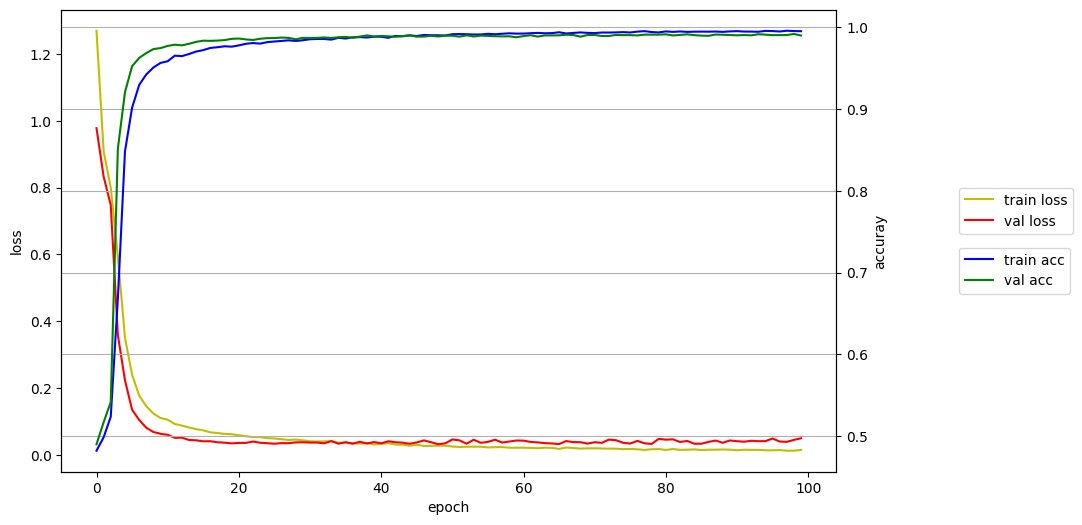

In [ ]:
# 학습 그래프 그리기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,6))
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5))
loss_ax.legend(loc='lower left', bbox_to_anchor=(1.15, 0.5))

plt.grid()
plt.show()

In [ ]:
from keras.models import load_model

# 학습시킨 모델 로드
model = load_model(checkpoint_path)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# X_test로 만든 pred
pred = model.predict(X_test)

263/263 [==============================] - 1s 4ms/step


In [ ]:
# 2차원인 y_test를 1차원으로 변경 (Fake와 Real중 큰 쪽을 택1)
# confusion matrix, f1-score, 재현율, 정확도 구하기 위함

label_test = np.argmax(y_test,axis=1)
label_test

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# 2차원인 pred_binary를 1차원으로 변경 (Fake와 Real중 큰 쪽을 택1)
# confusion matrix, f1-score, 재현율, 정확도 구하기 위함

label_pred = np.argmax(pred,axis=1)
label_pred

array([0, 0, 1, ..., 1, 1, 1])

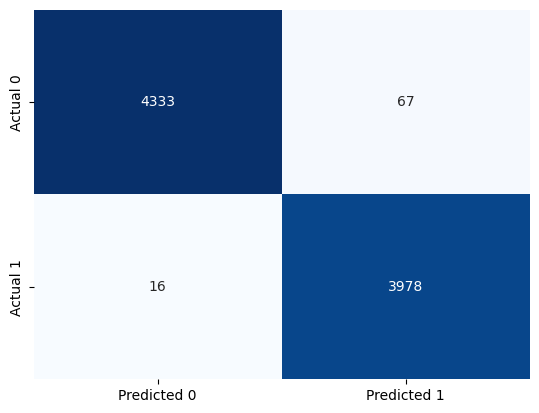

In [ ]:
# confusion matrix 이쁘게
import seaborn as sns
cm = confusion_matrix(label_test, label_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

# F1, acc, recall 구하기
f1_score = f1_score(label_test, label_pred)
acc_score = accuracy_score(label_test, label_pred)
recall_score = recall_score(label_test, label_pred)

print("F1-score:")
print(f"{f1_score:0.5f}")

print("acc-score:")
print(f"{acc_score:0.5f}")

print("recall-score:")
print(f"{recall_score:0.5f}")

F1-score:
0.98968
acc-score:
0.99011
recall-score:
0.99599


In [ ]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)

# save to csv:
hist_csv_file = '/content/drive/MyDrive/model/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)